# Data Cleaning for Scraped Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Course_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Page title          459 non-null    object
 1   UK Fees             459 non-null    object
 2   International Fees  459 non-null    object
 3   Duration            459 non-null    object
 4   Campus              459 non-null    object
 5   description         459 non-null    object
 6   Url                 459 non-null    object
dtypes: object(7)
memory usage: 25.2+ KB


In [4]:
df.describe()

,Page title,UK Fees,International Fees,Duration,Campus,description,Url
count,459,459,459,459,459,459,459
unique,275,37,34,10,4,234,459
top,Teaching English to Speakers of Other Language...,"£9,250","£17,000",1 year,"Regent, Central London",Our degree courses with Foundation year offer ...,https://www.westminster.ac.uk/biological-and-b...
freq,8,163,183,151,196,23,1


## Cleaning Data 

In [5]:
df['Page title'].head()

0    Applied Biotechnology MSc - Courses | Universi...
1    Architecture and Environmental Design MSc - Co...
2    Interior Architecture MA - Courses | Universit...
3    Master of Architecture (MArch) (RIBA pt II) - ...
4    Interactive Media Practice MA - Courses | Univ...
Name: Page title, dtype: object

- All courses have '| University of westminster london' need to remove this

In [6]:
df['Page title'] =df['Page title'].str.split(' - ').str[0]

- Page title cleaned

In [7]:
for _ , j in df.iterrows():
    if(j['UK Fees'][0] != '£') & (j['UK Fees'][0].isalnum()== False):
        print("issue")

- no issue in 'UK Fees' column

In [8]:
for _ , j in df.iterrows():
    if(j['International Fees'][0] != '£') & (j['International Fees'][0].isalnum()== False):
        print("issue")

- no issue in 'International Fees' column

In [9]:
df['Duration'].unique()

array(['1 year', '2 years', '2-5 years', '5 years', '4 years',
       '6-7 years', '6 years', '4 or 5 years', '3 or 4 years', '3 years'],
      dtype=object)

no issue  in  'Duration' column

In [10]:
df['Campus'].unique()

array(['Cavendish, Central London', 'Marylebone, Central London',
       'Harrow, North-West London', 'Regent, Central London'],
      dtype=object)

no issue in 'Campus' Column.

In [11]:
df['Page title'].nunique()

275

In [12]:
df.shape

(459, 7)

- it is clear that we have dublicate values. this is because we have part-time , full-time, distance learning course with same title and description.

### Need to create more columns to seperate part-time and full-time informations

In [13]:
def course_type_finder(x):
    if 'part-time' in x:
        return'part time'
    elif 'full-time' in x:
        return 'full time'
    elif 'block-release' in x:
        return 'block release'
    elif 'open-distance-learning' in x:
        return 'distance learning'
    else:
        return 'unknown'

In [14]:
df['course_type'] = df['Url'].apply(course_type_finder)

In [15]:
df['course_type'].unique()

array(['full time', 'block release', 'part time', 'distance learning'],
      dtype=object)

In [16]:
df.columns

Index(['Page title', 'UK Fees', 'International Fees', 'Duration', 'Campus',
       'description', 'Url', 'course_type'],
      dtype='object')

In [17]:
df['desc_len'] = len(df['description'])

In [18]:
new_df = df.pivot_table(index='Page title', 
                        columns='course_type', 
                        values=['UK Fees', 'International Fees','Campus', 
                                'Duration','description','Url','desc_len'],
                        aggfunc='first'
                        )

In [19]:
new_df.columns = new_df.columns.swaplevel(0, 1).map('_'.join).str.lower()

In [20]:
new_df['full time_desc_len'] = new_df['full time_desc_len'].fillna(new_df['part time_desc_len'])
new_df['full time_desc_len'] = new_df['full time_desc_len'].fillna(new_df['block release_desc_len'])
new_df['full time_desc_len'] = new_df['full time_desc_len'].fillna(new_df['distance learning_desc_len'])

# Campus
new_df['full time_campus'] = new_df['full time_campus'].fillna(new_df['part time_campus'])
new_df['full time_campus'] = new_df['full time_campus'].fillna(new_df['block release_campus'])
new_df['full time_campus'] = new_df['full time_campus'].fillna(new_df['distance learning_campus'])

# description
new_df['full time_description'] = new_df['full time_description'].fillna(new_df['part time_description'])
new_df['full time_description'] = new_df['full time_description'].fillna(new_df['block release_description'])
new_df['full time_description'] = new_df['full time_description'].fillna(new_df['distance learning_description'])



In [21]:
new_df.drop(['part time_desc_len','block release_desc_len','distance learning_desc_len','part time_campus',
         'block release_campus','distance learning_campus','part time_description','block release_description','distance learning_description'
         ],axis=1, inplace=True)



In [22]:
new_df.rename(columns={'full time_desc_len':'desc_len',
              'full time_campus': 'campus',
               'full time_description':'description' },inplace=True)

In [23]:
new_df.fillna('', inplace=True)

In [24]:
new_df = new_df.reset_index()
new_df.head(3)

,Page title,campus,block release_duration,distance learning_duration,full time_duration,part time_duration,block release_international fees,distance learning_international fees,full time_international fees,part time_international fees,block release_uk fees,distance learning_uk fees,full time_uk fees,part time_uk fees,block release_url,distance learning_url,full time_url,part time_url,desc_len,description
0,"AI, Data and Communication MA","Harrow, North-West London",,,1 year,2 years,,,"£17,500","£1,985",,,"£9,700","£1,125",,,https://www.westminster.ac.uk/computer-science...,https://www.westminster.ac.uk/computer-science...,459.0,It is estimated that there will be 97 million ...
1,Accounting BSc Honours,"Marylebone, Central London",,,3 or 4 years,,,,"£17,000",,,,"£9,250",,,,https://www.westminster.ac.uk/accounting-and-f...,,459.0,Our innovative accounting course is designed t...
2,Accounting and Business Management BA Honours,"Marylebone, Central London",,,3 or 4 years,,,,"£17,000",,,,"£9,250",,,,https://www.westminster.ac.uk/accounting-and-f...,,459.0,This degree is designed to equip you with a un...


In [25]:
new_df.shape

(275, 20)

# Data Analysis

In [26]:
def sorted_generate(df,col):

    try:
        df[f'{col} (int)'] = df[col].str.replace('\u00a3', '').str.replace(',', '').astype(int)
        sorted_val = df[f'{col} (int)'].sort_values().unique()
        original_labels = {int(fee.replace('\u00a3', '').replace(',', '')): fee for fee in df[col]}
        plt.figure(figsize=(12, 6))
        sns.countplot(
        y=f'{col} (int)',
        data=df,
        order=sorted_val)
        plt.yticks(ticks=range(len(sorted_val)), labels=[original_labels[fee] for fee in sorted_val])
    
    except:
        sorted_val = df[col].sort_values(ascending=False).unique()
        df[col] = pd.Categorical(df[col], categories=sorted_val, ordered=True)
        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=df, order=sorted_val)
    
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.title(f" {col} Distribution Across Study Modes")

    plt.show()


In [33]:
new_df.drop(columns=['desc_len','description'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Page title                            275 non-null    object
 1   campus                                275 non-null    object
 2   block release_duration                275 non-null    object
 3   distance learning_duration            275 non-null    object
 4   full time_duration                    275 non-null    object
 5   part time_duration                    275 non-null    object
 6   block release_international fees      275 non-null    object
 7   distance learning_international fees  275 non-null    object
 8   full time_international fees          275 non-null    object
 9   part time_international fees          275 non-null    object
 10  block release_uk fees                 275 non-null    object
 11  distance learning_uk fees       

In [34]:
new_df.drop(columns=['desc_len','description'],axis=1).describe()

,Page title,campus,block release_duration,distance learning_duration,full time_duration,part time_duration,block release_international fees,distance learning_international fees,full time_international fees,part time_international fees,block release_uk fees,distance learning_uk fees,full time_uk fees,part time_uk fees,block release_url,distance learning_url,full time_url,part time_url
count,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275
unique,275,4,2,2,7,8,2,2,15,15,2,2,11,18,2,2,268,110
top,"AI, Data and Communication MA","Regent, Central London",,,3 or 4 years,,,,"£17,000",,,,"£9,250",,,,,
freq,1,96,274,274,101,166,274,274,163,166,274,274,163,166,274,274,8,166


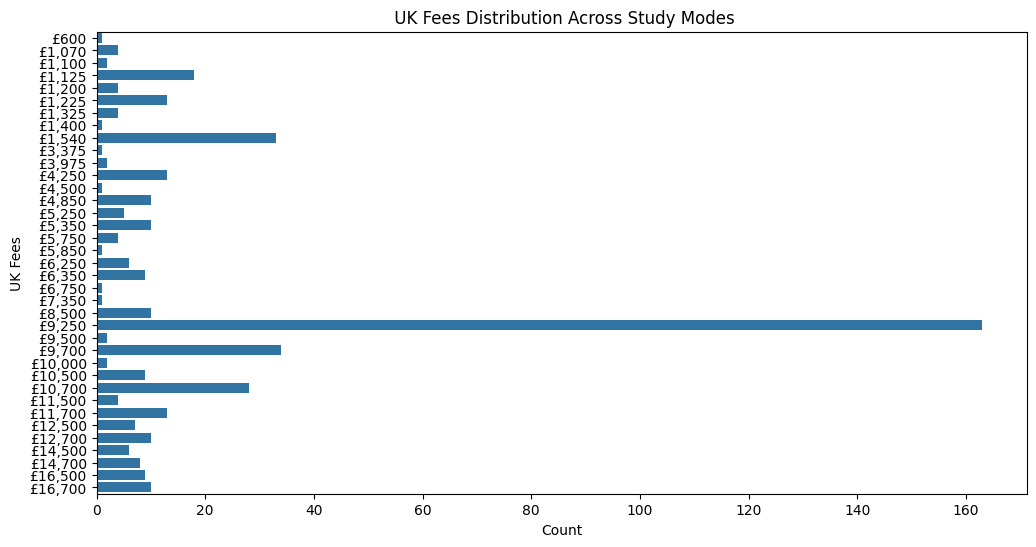

In [31]:
sorted_generate(df,'UK Fees')

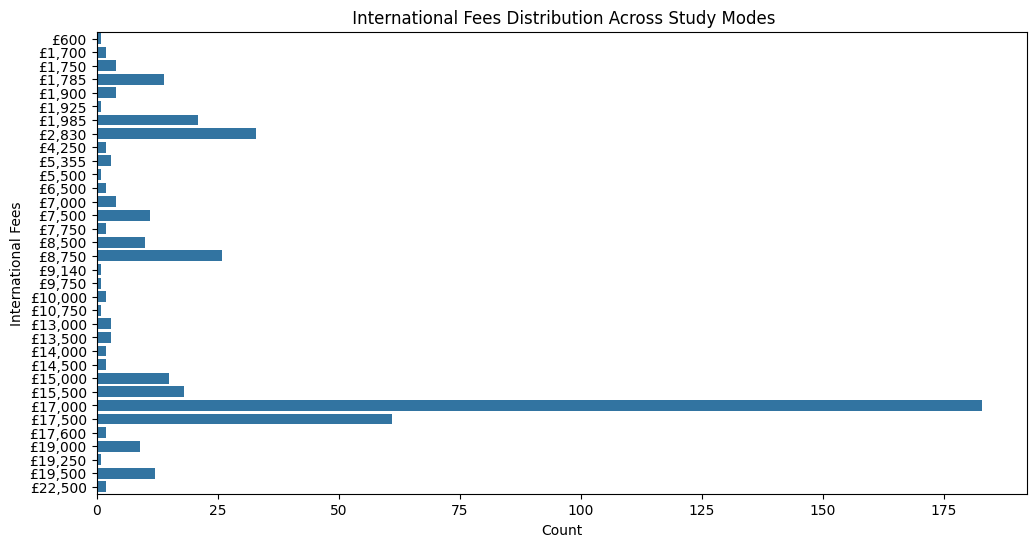

In [32]:
sorted_generate(df,'International Fees')

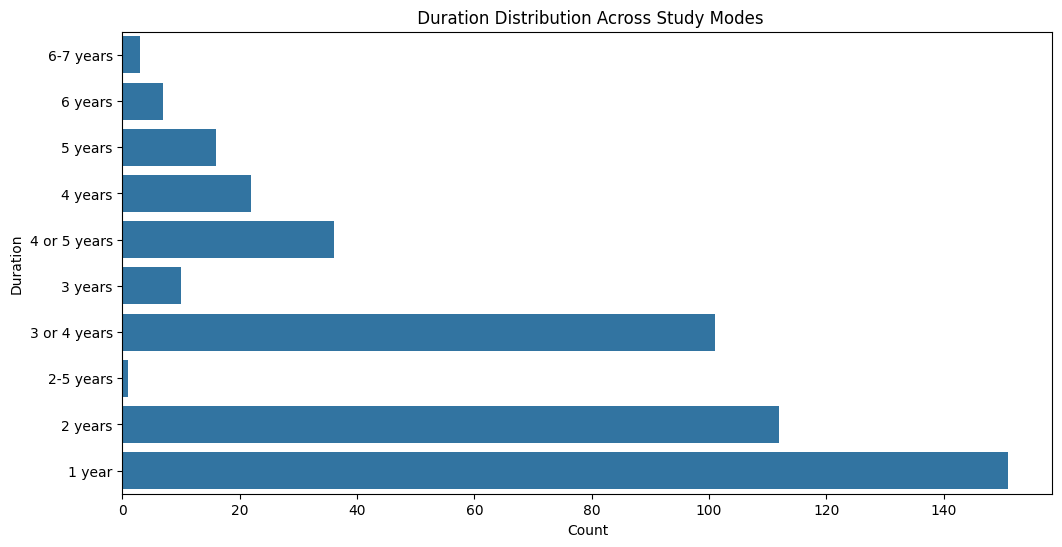

In [33]:
sorted_generate(df,'Duration')

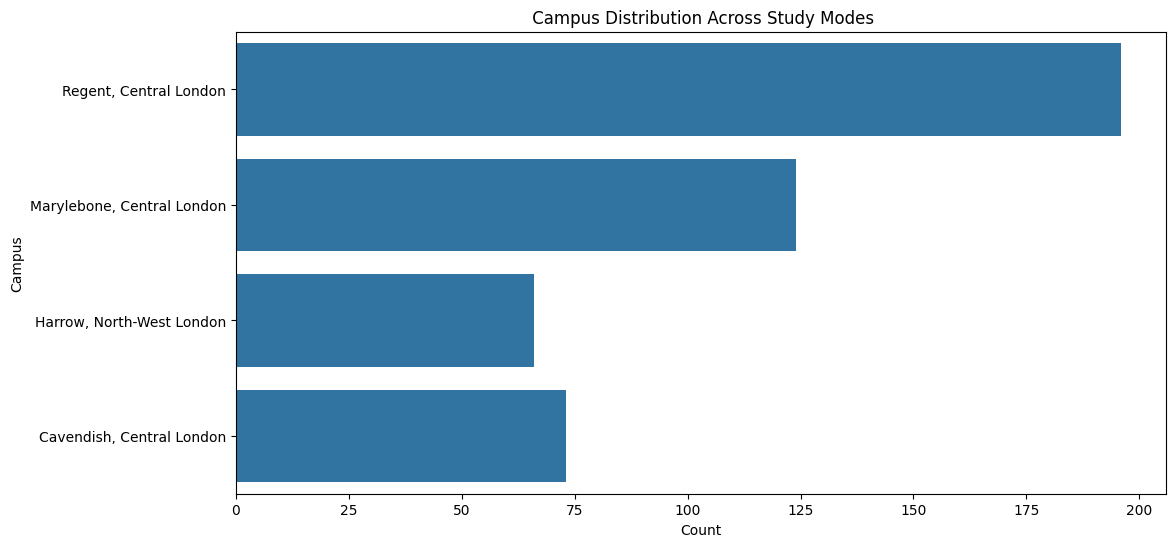

In [34]:
sorted_generate(df,'Campus')

In [35]:
new_df.rename(columns={'Page title':'page_title',
'block release_duration':'block_release_duration',
'distance learning_duration':'distance_learning_duration',
'full time_duration':'full_time_duration',
'part time_duration':'part_time_duration',
'block release_international fees':'block_release_international_fees',
'distance learning_international fees':'distance_learning_international_fees',
'full time_international fees':'full_time_international_fees',
'part time_international fees':'part_time_international_fees',
'block release_uk fees':'block_release_uk_fees',
'distance learning_uk fees':'distance_learning_uk_fees',
'full time_uk fees':'full_time_uk_fees',
'part time_uk fees':'part_time_uk_fees',
'block release_url':'block_release_url',
'distance learning_url':'distance_learning_url',
'full time_url':'full_time_url',
'part time_url':'part_time_url',
},inplace=True)

In [36]:
info = new_df.iloc[:1]
info

,page_title,campus,block_release_duration,distance_learning_duration,full_time_duration,part_time_duration,block_release_international_fees,distance_learning_international_fees,full_time_international_fees,part_time_international_fees,block_release_uk_fees,distance_learning_uk_fees,full_time_uk_fees,part_time_uk_fees,block_release_url,distance_learning_url,full_time_url,part_time_url,desc_len,description
0,"AI, Data and Communication MA","Harrow, North-West London",,,1 year,2 years,,,"£17,500","£1,985",,,"£9,700","£1,125",,,https://www.westminster.ac.uk/computer-science...,https://www.westminster.ac.uk/computer-science...,459.0,It is estimated that there will be 97 million ...


<hr>

# Creating Dataset for different Models.

## Dataset for Gemma and Mistral model

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('Cleaned_dataset.csv')
df.fillna(value='no_data', inplace=True)

In [3]:
df.head()

,index,page_title,campus,block_release_duration,distance_learning_duration,full_time_duration,part_time_duration,block_release_international_fees,distance_learning_international_fees,full_time_international_fees,...,full_time_uk_fees,part_time_uk_fees,block_release_url,distance_learning_url,full_time_url,part_time_url,desc_len,description,ai_description,desc_ai_len
0,0,"AI, Data and Communication MA","Harrow, North-West London",no_data,no_data,1 year,2 years,no_data,no_data,"£17,500",...,"£9,700","£1,125",no_data,no_data,https://www.westminster.ac.uk/computer-science...,https://www.westminster.ac.uk/computer-science...,242,It is estimated that there will be 97 million ...,Introducing a cutting-edge educational course...,275
1,1,Accounting BSc Honours,"Marylebone, Central London",no_data,no_data,3 or 4 years,no_data,no_data,no_data,"£17,000",...,"£9,250",no_data,no_data,no_data,https://www.westminster.ac.uk/accounting-and-f...,no_data,414,Our innovative accounting course is designed t...,This innovative accounting course is meticulo...,275
2,2,Accounting and Business Management BA Honours,"Marylebone, Central London",no_data,no_data,3 or 4 years,no_data,no_data,no_data,"£17,000",...,"£9,250",no_data,no_data,no_data,https://www.westminster.ac.uk/accounting-and-f...,no_data,615,This degree is designed to equip you with a un...,This innovative degree program offers a blend...,275
3,3,Air Transport Planning and Management MSc,"Marylebone, Central London",2 years,no_data,1 year,no_data,"£1,785",no_data,"£15,500",...,"£9,700",no_data,https://www.westminster.ac.uk/transport-and-lo...,no_data,https://www.westminster.ac.uk/transport-and-lo...,no_data,521,This course has been developed to meet the nee...,This innovative educational course caters to ...,275
4,4,Animation BA Honours,"Harrow, North-West London",no_data,no_data,3 or 4 years,no_data,no_data,no_data,"£17,000",...,"£9,250",no_data,no_data,no_data,https://www.westminster.ac.uk/art-design-and-v...,no_data,204,Our exciting specialist course will enable you...,This engaging specialist course nurtures both...,275


In [4]:
prompt_list = []
output_list = []
inputs_list = []

for index, row in df.iterrows():
    prompt = f"Does the University of Westminster offer a course on {row['page_title']}?"
    inputs = f"Course title: {row['page_title']}, Collage: University of Westminster,"
    output = f"Yes, University of Westminster provides a course on {row['page_title']}:\n"
    output += f"Course title: {row['page_title']}.\n"
    output += f"Campus: {row['campus']}.\n"
    inputs += f"Campus: {row['campus']}"

    # output += f"Description: {row['ai_description']}\n"
    if str(row['full_time_duration']) != 'no_data':
        output += f"For full-time course:\n"
        output += f"UK fees:{row['full_time_uk_fees']}.\n"
        output += f"international fees: {row['full_time_international_fees']}.\n"
        output += f"The duration of the course is {row['full_time_duration']}.\n"
        output += f"For more details please visit the official website: {row['full_time_url']}"

        inputs = f"Course title: {row['page_title']}, Collage: University of Westminster, Campus: {row['campus']}. For full-time course: UK fees is {row['full_time_uk_fees']} and international fees is {row['full_time_international_fees']}. Duration of the course is {row['full_time_duration']}, link: {row['full_time_url']}."

    if str(row['part_time_duration']) != 'no_data':
        output += f"\nFor Part-time course:\n"
        output += f"UK fees: {row['part_time_uk_fees']}.\n"
        output += f"international fees: {row['part_time_international_fees']}.\n"
        output += f"The duration of the course is {row['part_time_duration']}.\n"
        output += f"For more details please visit the official website: {row['part_time_url']} "
        inputs+= f" For Part-time course: UK fees is {row['part_time_uk_fees']}, International fees is {row['part_time_international_fees']}. Duration of the course is {row['part_time_duration']}, link: {row['part_time_url']}."

    if str(row['block_release_duration']) != 'no_data':
        output += f"\nCheck this for new release:\n "
        output += f"{row['block_release_url']}"
        inputs += f" New release of course is available at: {row['block_release_url']}" 


    if str(row['distance_learning_duration']) != 'no_data':
        output += f"\nThere are distance_learing options are also available:\n"
        output += f"UK fees: {row['distance_learning_uk_fees']}.\n"
        output += f"International fees: {row['distance_learning_international_fees']}.\n"
        output += f"Duration of the course: {row['distance_learning_duration']}.\n"
        output += f"For more details please visit the official website: {row['distance_learning_url']}\n"

        inputs += f" There are distance_learing options are also available. UK fees is {row['distance_learning_uk_fees']}, International fees is {row['distance_learning_international_fees']}. Duration of the course is {row['distance_learning_duration']}, link: {row['distance_learning_url']}"
    
    prompt_list.append(prompt)
    output_list.append(output)
    inputs_list.append(inputs)


In [5]:
df1= pd.DataFrame({'instructions': prompt_list, 'input':inputs_list ,'output': output_list})

In [6]:
print(df1['output'].values[0])

Yes, University of Westminster provides a course on AI, Data and Communication MA:
Course title: AI, Data and Communication MA.
Campus: Harrow, North-West London.
For full-time course:
UK fees:£9,700.
international fees: £17,500.
The duration of the course is 1 year.
For more details please visit the official website: https://www.westminster.ac.uk/computer-science-and-engineering-data-science-and-informatics-media-and-communication-courses/2025-26/september/full-time/ai-data-and-communication-ma
For Part-time course:
UK fees: £1,125.
international fees: £1,985.
The duration of the course is 2 years.
For more details please visit the official website: https://www.westminster.ac.uk/computer-science-and-engineering-data-science-and-informatics-media-and-communication-courses/2025-26/september/part-time-day-evening/ai-data-and-communication-ma 


In [7]:
print(df1['input'].values[0])

Course title: AI, Data and Communication MA, Collage: University of Westminster, Campus: Harrow, North-West London. For full-time course: UK fees is £9,700 and international fees is £17,500. Duration of the course is 1 year, link: https://www.westminster.ac.uk/computer-science-and-engineering-data-science-and-informatics-media-and-communication-courses/2025-26/september/full-time/ai-data-and-communication-ma. For Part-time course: UK fees is £1,125, International fees is £1,985. Duration of the course is 2 years, link: https://www.westminster.ac.uk/computer-science-and-engineering-data-science-and-informatics-media-and-communication-courses/2025-26/september/part-time-day-evening/ai-data-and-communication-ma.


In [58]:
df1.to_csv('gemma_dataset.csv',index=False)

# Dataset for Llama and Phi model

In [150]:
import numpy as np 
import pandas as pd

In [151]:
df = pd.read_csv('Cleaned_dataset.csv')
df.fillna(value='no_data', inplace=True)

In [ ]:
df.head()

In [153]:
prompt_list = []
output_list = []
inputs_list = []

for index, row in df.iterrows():
    prompt = f"Does the University of Westminster offer a course on {row['page_title']}?"
    inputs = f"Course title: {row['page_title']}, Collage: University of Westminster,"
    output = f"Yes, University of Westminster provides a course on {row['page_title']}:\n"
    output += f"Course title: {row['page_title']}.\n"
    output += f"Campus: {row['campus']}.\n"
    inputs += f"Campus: {row['campus']}"

    # output += f"Description: {row['ai_description']}\n"
    if str(row['full_time_duration']) != 'no_data':
        output += f"For full-time course:\n"
        output += f"UK fees:{row['full_time_uk_fees']}.\n"
        output += f"international fees: {row['full_time_international_fees']}.\n"
        output += f"The duration of the course is {row['full_time_duration']}.\n"
        output += f"For more details please visit the official website: {row['full_time_url']}"

        inputs = f"Course title: {row['page_title']}, Collage: University of Westminster, Campus: {row['campus']}. For full-time course: UK fees is {row['full_time_uk_fees']} and international fees is {row['full_time_international_fees']}. Duration of the course is {row['full_time_duration']}, link: {row['full_time_url']}."

    if str(row['part_time_duration']) != 'no_data':
        output += f"\nFor Part-time course:\n"
        output += f"UK fees: {row['part_time_uk_fees']}.\n"
        output += f"international fees: {row['part_time_international_fees']}.\n"
        output += f"The duration of the course is {row['part_time_duration']}.\n"
        output += f"For more details please visit the official website: {row['part_time_url']} "
        inputs+= f" For Part-time course: UK fees is {row['part_time_uk_fees']}, International fees is {row['part_time_international_fees']}. Duration of the course is {row['part_time_duration']}, link: {row['part_time_url']}."

    if str(row['block_release_duration']) != 'no_data':
        output += f"\nCheck this for new release:\n "
        output += f"{row['block_release_url']}"
        inputs += f" New release of course is available at: {row['block_release_url']}" 


    if str(row['distance_learning_duration']) != 'no_data':
        output += f"\nThere are distance_learing options are also available:\n"
        output += f"UK fees: {row['distance_learning_uk_fees']}.\n"
        output += f"International fees: {row['distance_learning_international_fees']}.\n"
        output += f"Duration of the course: {row['distance_learning_duration']}.\n"
        output += f"For more details please visit the official website: {row['distance_learning_url']}\n"

        inputs += f" There are distance_learing options are also available. UK fees is {row['distance_learning_uk_fees']}, International fees is {row['distance_learning_international_fees']}. Duration of the course is {row['distance_learning_duration']}, link: {row['distance_learning_url']}"
    
    prompt_list.append(prompt)
    output_list.append(output)
    inputs_list.append(inputs)


In [154]:
df1= pd.DataFrame({'instructions': prompt_list, 'input':inputs_list ,'output': output_list})

In [155]:
co = []
for index, row in df1.iterrows():
    x = {}
    y = {}
    x = {'content': row['instructions'], 'role': 'user'}
    y = {'content': row['output'], 'role':'assistant'}

    co.append([x,y])

In [156]:
x = pd.DataFrame([co]).T
x = x.reset_index(drop=True)
x = x.rename({0:"conversations"},axis=1)

In [ ]:
x['conversations'][0]

In [48]:
x.to_parquet("llama_dataset.parquet", engine="pyarrow", index=False)